In [14]:
import pandas as pd
import flair
import numpy as np
import time
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [15]:
df = pd.read_csv('Trial3.csv')
df

,Unnamed: 0,Unnamed: 0.1,index,Tweet ID,Claim ID,Claim,Category,Tweet,Full_date,Date,Time
0,0,0,0,1254569956672450561,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",BREAK CURFEW! \r\n\r\n#COVID1984\r\n#SCAMDEMIC...,2020-11-09 13:08:18,2020-11-09,13:08:18
1,1,1,1,1255080816994025474,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",A MASK is better than a VENTILATOR.\r\nHOME is...,2020-11-09 06:13:41,2020-11-09,06:13:41
2,2,2,2,1251864580298506243,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",The latest One Wireless Place Times! https://t...,2020-11-09 11:04:41,2020-11-09,11:04:41
3,3,3,3,1248753789177335808,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",#Kenya Nakuru - over 500 customers ignoring c...,2020-11-08 09:05:59,2020-11-08,09:05:59
4,4,4,4,1252408156036030465,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",Bandaragama Police arrested a suspect who misu...,2020-11-04 12:57:17,2020-11-04,12:57:17
...,...,...,...,...,...,...,...,...,...,...,...
194255,499940,499940,989,1252672175032668161,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What is the potential of #5G? What will be its...,2020-07-30 08:31:09,2020-07-30,08:31:09
194256,499944,499944,993,1248011136999419906,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Until now #Terroristan and #Chinese used to se...,2020-07-21 05:34:28,2020-07-21,05:34:28
194257,499945,499945,994,1248369367865270273,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Serious question: If someone deliberately coug...,2020-08-01 22:13:01,2020-08-01,22:13:01
194258,499946,499946,995,1250196981550481408,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What's the thinking behind gathering in large ...,2020-08-02 01:23:47,2020-08-02,01:23:47


In [16]:
### BETTER SENTIMENT ANALYZER, BUT TAKES TOO LONG AND PRETRAINED ON IMDB REVIEWS, NOT AS GOOD FOR TWEETS
# t0 = time.time()
# flair_sentiment = flair.models.TextClassifier.load('sentiment-fast')
# s = flair.data.Sentence(sentence)
# flair_sentiment.predict(s)
# total_sentiment = s.labels
# t1 = time.time() - t0
# print(total_sentiment)
# print(t1)

In [17]:
"""
If you use the VADER sentiment analysis tools, please cite:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
"""
new_words = {
    '#covidiot': -1.4, 
    '#covidiots': -1.5
}

sia = SentimentIntensityAnalyzer()
sia.lexicon.update(new_words)
sia.lexicon
#nltk.download('vader_lexicon')

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [18]:
#sentence = "good stuff!"
#t2 = time.time()
def assign_sentiment(tweet):
    scores = sia.polarity_scores(tweet)
    if scores['compound'] >= 0.1:
        return 'positive'
    elif scores['compound'] <= -0.1:
        return 'negative'
    else:
        return 'neutral'
    
#print(time.time() - t0)

sentiments = [assign_sentiment(tweet) for tweet in df['Tweet']]
df['Sentiment'] = sentiments

In [19]:
df.to_csv('SentimentData.csv')

In [20]:
# sia.polarity_scores("Hospitality businesses hammered in Nicola Sturgeon's new curfew and shutdown.")

In [21]:
df['Sentiment'].value_counts()

negative    94020
positive    57428
neutral     42812
Name: Sentiment, dtype: int64

In [22]:
df

,Unnamed: 0,Unnamed: 0.1,index,Tweet ID,Claim ID,Claim,Category,Tweet,Full_date,Date,Time,Sentiment
0,0,0,0,1254569956672450561,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",BREAK CURFEW! \r\n\r\n#COVID1984\r\n#SCAMDEMIC...,2020-11-09 13:08:18,2020-11-09,13:08:18,neutral
1,1,1,1,1255080816994025474,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",A MASK is better than a VENTILATOR.\r\nHOME is...,2020-11-09 06:13:41,2020-11-09,06:13:41,positive
2,2,2,2,1251864580298506243,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",The latest One Wireless Place Times! https://t...,2020-11-09 11:04:41,2020-11-09,11:04:41,neutral
3,3,3,3,1248753789177335808,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",#Kenya Nakuru - over 500 customers ignoring c...,2020-11-08 09:05:59,2020-11-08,09:05:59,negative
4,4,4,4,1252408156036030465,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",Bandaragama Police arrested a suspect who misu...,2020-11-04 12:57:17,2020-11-04,12:57:17,negative
...,...,...,...,...,...,...,...,...,...,...,...,...
194255,499940,499940,989,1252672175032668161,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What is the potential of #5G? What will be its...,2020-07-30 08:31:09,2020-07-30,08:31:09,positive
194256,499944,499944,993,1248011136999419906,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Until now #Terroristan and #Chinese used to se...,2020-07-21 05:34:28,2020-07-21,05:34:28,negative
194257,499945,499945,994,1248369367865270273,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Serious question: If someone deliberately coug...,2020-08-01 22:13:01,2020-08-01,22:13:01,negative
194258,499946,499946,995,1250196981550481408,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What's the thinking behind gathering in large ...,2020-08-02 01:23:47,2020-08-02,01:23:47,negative


In [23]:
CATEGORIES = [
    'Public authority actions, policy, and communications', 
    'Community spread and impact',
    'Medical advice and self-treatments',
    'Conspiracy theories',
    'Virus transmission',
    'Virus origin and properties',
    'Public preparedness, protests, and civil disobedience',
    'Vaccines, medical treatments, and tests',
]

cat_counts = [len(df[df['Category'] == cat]) for cat in CATEGORIES]
cat_idx = list(range(1,9))

sent_dict = {}
sdict_norm = {}

sent_vc = df[["Category", "Sentiment"]].value_counts()
for (cat, sen), c in sent_vc.iteritems(): 
    idx = CATEGORIES.index(cat)
    if idx not in sent_dict:
        sent_dict[idx] = {}
    if sen not in sent_dict[idx]:
        sent_dict[idx][sen] = 0
    sent_dict[idx][sen] = c

sent_dict = dict(sorted(sent_dict.items()))

# Lists of sentiment frequencies for each category 
negatives = [sent_dict[i]['negative'] for i in range(8)] 
positives = [sent_dict[i]['positive'] for i in range(8)]
neutrals = [sent_dict[i]['neutral'] for i in range(8)]

norm_neg = [(round(negatives[i]/cat_counts[i],4))*100 for i in range(8)] # Percentages with two decimals
norm_pos = [(round(positives[i]/cat_counts[i],4))*100 for i in range(8)]
norm_neut = [(round(neutrals[i]/cat_counts[i],4))*100 for i in range(8)]

print(cat_counts)

[64430, 46390, 30560, 15415, 6510, 6421, 7633, 16901]


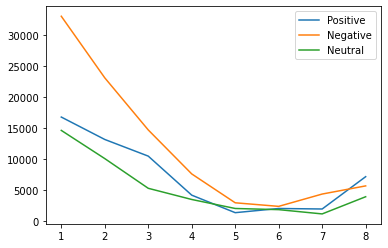

In [24]:
import matplotlib.pyplot as plt

plt.plot(cat_idx, positives, label = "Positive")
plt.plot(cat_idx, negatives, label = "Negative")
plt.plot(cat_idx, neutrals, label = "Neutral")
plt.legend()
plt.show()

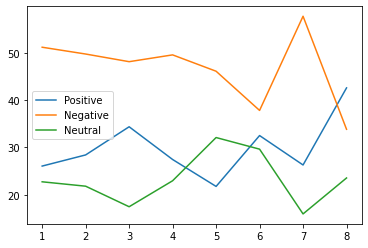

In [25]:
plt.plot(cat_idx, norm_pos, label = "Positive")
plt.plot(cat_idx, norm_neg, label = "Negative")
plt.plot(cat_idx, norm_neut, label = "Neutral")
plt.legend()
plt.show()

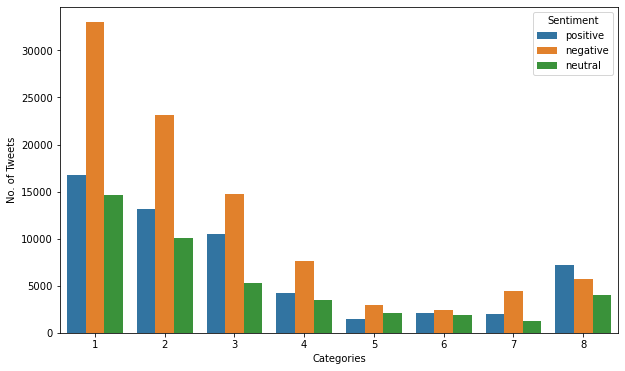

In [26]:
import seaborn as sns

plot_df = pd.DataFrame(zip(cat_idx*8, ["positive"]*8 + ['negative']*8 + ['neutral']*8, positives + negatives + neutrals), columns = ['Categories', 'Sentiment', 'No. of Tweets'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Categories", hue="Sentiment", y="No. of Tweets", data=plot_df)
plt.show()


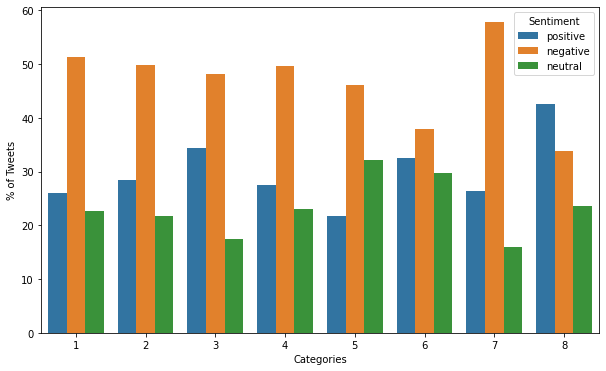

In [27]:
plot_df = pd.DataFrame(zip(cat_idx*8, ["positive"]*8 + ['negative']*8 + ['neutral']*8, norm_pos + norm_neg + norm_neut), columns = ['Categories', 'Sentiment', '% of Tweets'])
plt.figure(figsize=(10, 6))
g = sns.barplot(x="Categories", hue="Sentiment", y="% of Tweets", data=plot_df)
plt.show()

In [28]:
top50cids = sorted(list(df['Claim ID'].unique()))
claim_counts = [len(df[df['Claim ID'] == cid]) for cid in top50cids]


claim_sents = {}

vc2 = df[["Claim ID", "Sentiment"]].value_counts()
for (cid, sen), c in vc2.iteritems(): 
    if cid not in claim_sents:
        claim_sents[cid] = {}
    if sen not in claim_sents[cid]:
        claim_sents[cid][sen] = 0
    claim_sents[cid][sen] = c

claim_sents = dict(sorted(claim_sents.items()))


# print(claim_sents)
c_negatives = [claim_sents[i]['negative'] for i in top50cids] 
c_positives = [claim_sents[i]['positive'] for i in top50cids]
c_neutrals = [claim_sents[i]['neutral'] for i in top50cids]
print(c_negatives)
print(claim_counts)

claim_sents

c_norm_neg = [(round(c_negatives[i]/claim_counts[i],4))*100 for i in range(49)] # Percentages with two decimals
c_norm_pos = [(round(c_positives[i]/claim_counts[i],4))*100 for i in range(49)]
c_norm_neut = [(round(c_neutrals[i]/claim_counts[i],4))*100 for i in range(49)]

print(c_norm_neg)

[2444, 3101, 1825, 3394, 6328, 4062, 1508, 1679, 1110, 1519, 1056, 3251, 1383, 916, 3045, 1298, 1674, 2699, 1808, 1133, 182, 1077, 1723, 720, 704, 1583, 748, 1300, 201, 2462, 1549, 2430, 1309, 826, 726, 1142, 1328, 152, 3004, 566, 586, 2597, 2900, 2364, 4347, 3266, 3587, 2829, 2579]
[6517, 5437, 5165, 7498, 7093, 7039, 3110, 3009, 1930, 3265, 2764, 7531, 3390, 2308, 5686, 3966, 2907, 4787, 3380, 2097, 409, 2979, 4523, 3030, 1576, 4183, 1551, 2770, 541, 5802, 3283, 6421, 2196, 2118, 1647, 2506, 2119, 229, 6510, 1313, 1207, 6002, 3644, 4594, 7995, 8385, 7044, 5450, 5354]
[37.5, 57.04, 35.33, 45.269999999999996, 89.21, 57.709999999999994, 48.49, 55.800000000000004, 57.50999999999999, 46.52, 38.21, 43.169999999999995, 40.8, 39.69, 53.55, 32.73, 57.589999999999996, 56.379999999999995, 53.49, 54.03, 44.5, 36.15, 38.09, 23.76, 44.67, 37.84, 48.230000000000004, 46.93, 37.15, 42.43, 47.18, 37.84, 59.61, 39.0, 44.080000000000005, 45.57, 62.67, 66.38, 46.14, 43.11, 48.55, 43.269999999999996, 79.5

In [29]:
def plot_claim_sentiment(yaxis, ylabel):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(top50cids, yaxis)
    ax.set_ylim([0,100])
    plt.xticks(rotation=90)
    plt.xlabel("Claim ID")
    plt.ylabel(ylabel)
    plt.show()

C:\Users\palas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


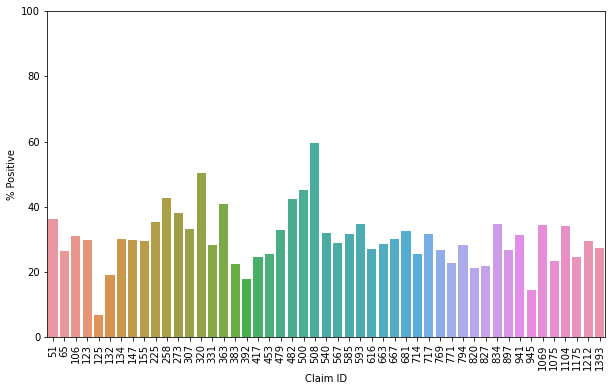

In [30]:
plot_claim_sentiment(c_norm_pos, "% Positive")

C:\Users\palas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


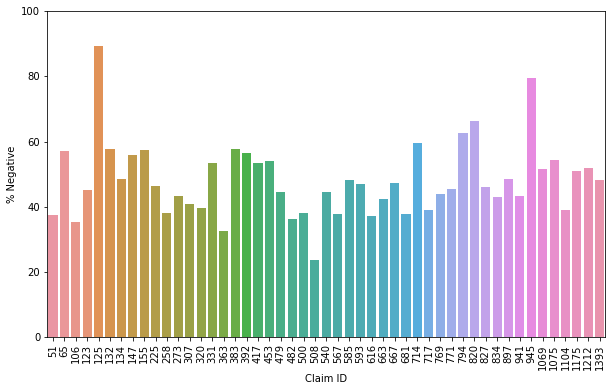

In [31]:
plot_claim_sentiment(c_norm_neg, "% Negative")

C:\Users\palas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


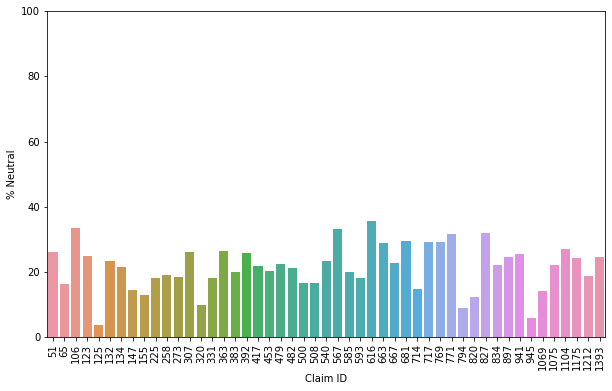

In [32]:
plot_claim_sentiment(c_norm_neut, "% Neutral")

In [37]:
#df.drop('Unnamed: 0', axis=1, inplace=True)

In [36]:
df

,Unnamed: 0.1,index,Tweet ID,Claim ID,Claim,Category,Tweet,Full_date,Date,Time,Sentiment
0,0,0,1254569956672450561,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",BREAK CURFEW! \r\n\r\n#COVID1984\r\n#SCAMDEMIC...,2020-11-09 13:08:18,2020-11-09,13:08:18,neutral
1,1,1,1255080816994025474,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",A MASK is better than a VENTILATOR.\r\nHOME is...,2020-11-09 06:13:41,2020-11-09,06:13:41,positive
2,2,2,1251864580298506243,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",The latest One Wireless Place Times! https://t...,2020-11-09 11:04:41,2020-11-09,11:04:41,neutral
3,3,3,1248753789177335808,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",#Kenya Nakuru - over 500 customers ignoring c...,2020-11-08 09:05:59,2020-11-08,09:05:59,negative
4,4,4,1252408156036030465,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",Bandaragama Police arrested a suspect who misu...,2020-11-04 12:57:17,2020-11-04,12:57:17,negative
...,...,...,...,...,...,...,...,...,...,...,...
194255,499940,989,1252672175032668161,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What is the potential of #5G? What will be its...,2020-07-30 08:31:09,2020-07-30,08:31:09,positive
194256,499944,993,1248011136999419906,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Until now #Terroristan and #Chinese used to se...,2020-07-21 05:34:28,2020-07-21,05:34:28,negative
194257,499945,994,1248369367865270273,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",Serious question: If someone deliberately coug...,2020-08-01 22:13:01,2020-08-01,22:13:01,negative
194258,499946,995,1250196981550481408,663,trump is promising to send americans checks ...,"Public authority actions, policy, and communic...",What's the thinking behind gathering in large ...,2020-08-02 01:23:47,2020-08-02,01:23:47,negative
